In [1]:
import graphviz
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import misc
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz

<H3>SETTING UP GRAPH PALETTES</H3>

In [2]:
red_blue=["#19B5FE","#EF4836"]
palette=sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")
%matplotlib inline

<h3>LOAD DATASET</h3>

<p>  1) Load data into DataFrame object from csv</p>
<p>  2) Examine overall structure</p>
<p>  3) Split train / test population</p>

In [3]:
data = pd.read_csv('data/data.csv')
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [4]:
train, test = train_test_split(data, test_size=0.30)

print("Training samples: {}; Test samples:{}".format(len(train),len(test)))

Training samples: 1411; Test samples:606


In [5]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


<h3>Split Series Data by Sentiment</h3>
<p>Sentiment is the 'target' value. 1 representing that a song was liked whereas 0 represents that a song was disliked.</p>

In [6]:
pos_tempo=data[data['target']==1]['tempo']
neg_tempo=data[data['target']==0]['tempo']
pos_dance = data[data['target'] == 1]['danceability']
neg_dance = data[data['target'] == 0]['danceability']
pos_duration = data[data['target'] == 1]['duration_ms']
neg_duration = data[data['target'] == 0]['duration_ms']
pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']
pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']
pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']
pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']
pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness']
pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']
pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']

<h3>Sample Histogram for Song Tempo Like / Dislike distribution</h3>

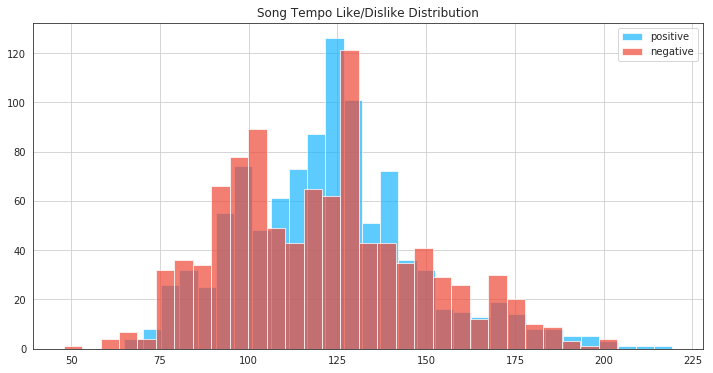

In [7]:
fig = plt.figure(figsize=(12,6))
plt.title("Song Tempo Like/Dislike Distribution")
pos_tempo.hist(alpha=0.7,bins=30,label='positive')
neg_tempo.hist(alpha=0.7,bins=30,label='negative')
plt.legend(loc="upper right")

<h3>similarly for other features</h3>

/home/devesh/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/devesh/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/devesh/anaconda3/lib/python3.7/site-packages/matplotlib/

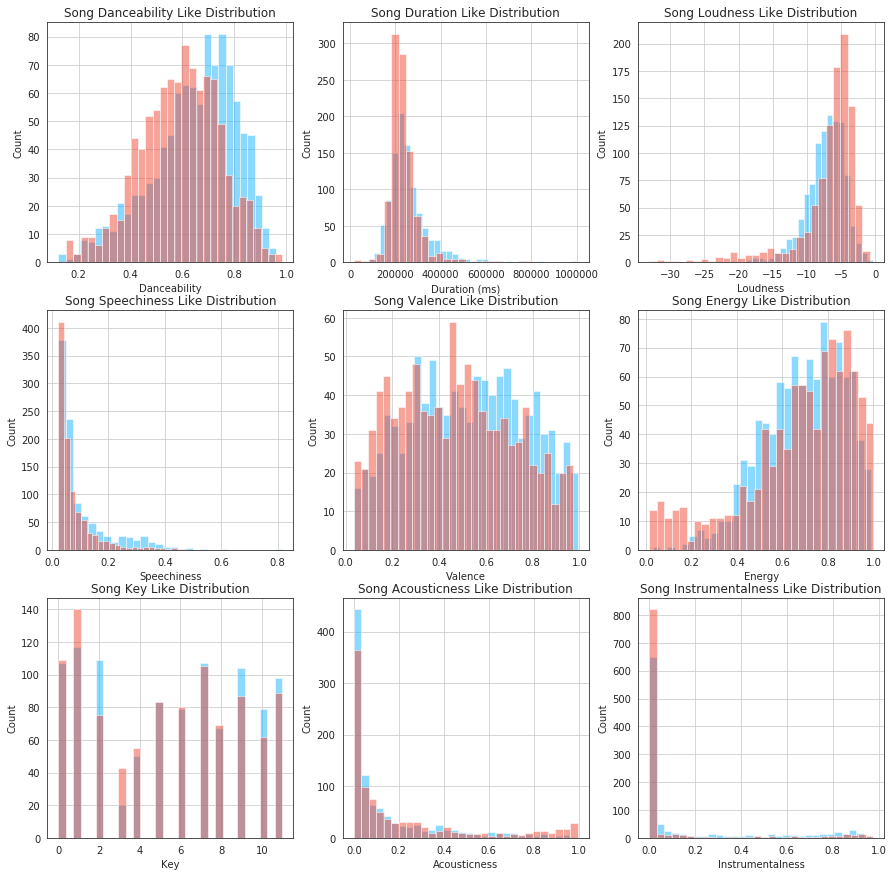

In [8]:
fig2 = plt.figure(figsize=(15, 15))

# Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title("Song Danceability Like Distribution")
pos_dance.hist(alpha=0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha=0.5, bins=30)


# Duration
ax5 = fig2.add_subplot(332)
pos_duration.hist(alpha=0.5, bins=30)
ax5.set_xlabel('Duration (ms)')
ax5.set_ylabel('Count')
ax5.set_title("Song Duration Like Distribution")
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha=0.5, bins=30)


# Loudness
ax7 = fig2.add_subplot(333)
pos_loudness.hist(alpha=0.5, bins=30)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title("Song Loudness Like Distribution")

ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30)

# Speechiness
ax9 = fig2.add_subplot(334)
pos_speechiness.hist(alpha=0.5, bins=30)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title("Song Speechiness Like Distribution")

ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha=0.5, bins=30)

# Valence
ax11 = fig2.add_subplot(335)
pos_valence.hist(alpha=0.5, bins=30)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title("Song Valence Like Distribution")

ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30)

# Energy
ax13 = fig2.add_subplot(336)
pos_energy.hist(alpha=0.5, bins=30)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title("Song Energy Like Distribution")

ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)

# Key
ax15 = fig2.add_subplot(337)
pos_key.hist(alpha=0.5, bins=30)
ax15.set_xlabel('Key')
ax15.set_ylabel('Count')
ax15.set_title("Song Key Like Distribution")

ax15 = fig2.add_subplot(337)
neg_key.hist(alpha=0.5, bins=30)

# Acousticness
ax16 = fig2.add_subplot(338)
pos_acousticness.hist(alpha=0.5, bins=30)
ax16.set_xlabel('Acousticness')
ax16.set_ylabel('Count')
ax16.set_title("Song Acousticness Like Distribution")

ax16 = fig2.add_subplot(338)
neg_acousticness.hist(alpha=0.5, bins=30)

# Instrumentalness
ax17 = fig2.add_subplot(339)
pos_instrumentalness.hist(alpha=0.5, bins=30)
ax17.set_xlabel('Instrumentalness')
ax17.set_ylabel('Count')
ax17.set_title("Song Instrumentalness Like Distribution")

ax17 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)

<h3>Build a simple Decision Tree Classifier based on a set of features</h3>

In [9]:
c= tree.DecisionTreeClassifier(min_samples_leaf=20,random_state=10)

In [10]:
features = ["valence", "energy", "danceability", "speechiness", "acousticness", "instrumentalness", "loudness","duration_ms","liveness","tempo","time_signature","mode","key"]

In [11]:
X_train = train[features]
y_train = train["target"]

X_test = test[features]
y_test = test["target"]

dt = c.fit(X_train, y_train)

<h3>Run prediction on test data</h3>

In [12]:
y_pred=c.predict(X_test)

In [13]:
score=accuracy_score(y_test,y_pred)*100
rounded_score=round(score,1)

print("Decision tree classifier accuracy : {}%".format(rounded_score))

Decision tree classifier accuracy : 71.5%


<h2>Random Forest clssifier</h2>

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

In [15]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [16]:
y_pred=rf.predict(X_test)

In [18]:
score=accuracy_score(y_test,y_pred)*100
rounded_score=round(score,1)

print("Random forest classifier accuracy : {}%".format(rounded_score))

Random forest classifier accuracy : 75.6%
